In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
import pandas as pd
import seaborn as sns; sns.set()

In [52]:
food = pd.read_csv("en.openfoodfacts.org.products.tsv", sep='\t',low_memory=False)

In [53]:
food.shape


(333824, 162)

In [54]:
names=food.columns.values
print (names)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags' 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' '

In [39]:
# print the rows with missing data
print ("The count of rows with missing data: \n", food.isnull().sum())

The count of rows with missing data: 
 code                                    24
url                                     24
creator                                  2
created_t                                3
created_datetime                         9
last_modified_t                          0
last_modified_datetime                   0
product_name                         17655
generic_name                        278761
quantity                            223273
packaging                           250561
packaging_tags                      250561
brands                               29195
brands_tags                          29207
categories                          243038
categories_tags                     243060
categories_en                       243038
origins                             310588
origins_tags                        310625
manufacturing_places                295154
manufacturing_places_tags           295160
labels                              282771
labels_tags    

In [40]:
food=food.fillna(-1)

In [41]:
# Show the Frequency distribution
print ("\n Food brands around the world")
foodBrands=food['brands'].value_counts(sort=True,dropna=False)
print (foodBrands)


 Food brands around the world
-1                                          29195
Carrefour                                    3267
Auchan                                       2652
U                                            2252
Meijer                                       1995
Leader Price                                 1812
Casino                                       1787
Kroger                                       1661
Ahold                                        1370
Spartan                                      1341
Roundy's                                     1299
Great Value                                  1230
Cora                                         1183
Weis                                         1053
Picard                                       1005
Target Stores                                 947
Shoprite                                      944
Coop                                          859
Food Club                                     831
Monoprix           

In [42]:
foodCategory=food['categories_en'].value_counts(sort=True, dropna=False)
print (foodCategory)

-1                                                                                                                                                                                                                                                                                                                                   243038
Beverages,Non-sugared beverages                                                                                                                                                                                                                                                                                                         940
Sugary snacks,Biscuits and cakes,Biscuits                                                                                                                                                                                                                                                                                               829
Suga

In [43]:
manufacPlace=food['manufacturing_places'].value_counts(sort=True, dropna=False)
print (manufacPlace)

-1                                                                                                                                                                                                                                                                                                                     295154
France                                                                                                                                                                                                                                                                                                                  10047
Italie                                                                                                                                                                                                                                                                                                                   1349
Suisse                                        

In [44]:
foodCountry=food['countries'].value_counts(sort=True, dropna=False)
print (foodCountry)

US                                                                                                                                                                                                                                                                 169905
France                                                                                                                                                                                                                                                              86910
en:FR                                                                                                                                                                                                                                                               17456
Suisse                                                                                                                                                                                                    

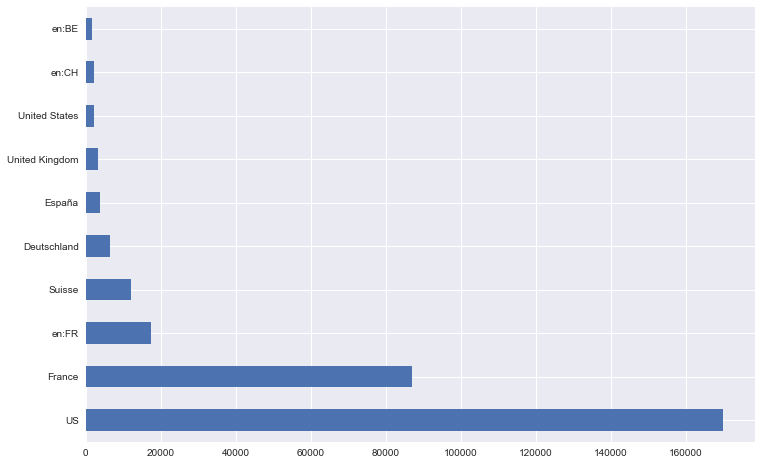

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Now plot the frequencies of the country in dataset
plt.figure(figsize=(12,8))
food.countries.value_counts().head(10).plot(kind='barh')

In [55]:
#sklearn

In [56]:
#clean data

In [57]:
food_clean=food[food.product_name.notnull()]
food_clean=food_clean[food_clean.countries_en.notnull()]
alcohol=food_clean[food_clean.alcohol_100g.notnull()]

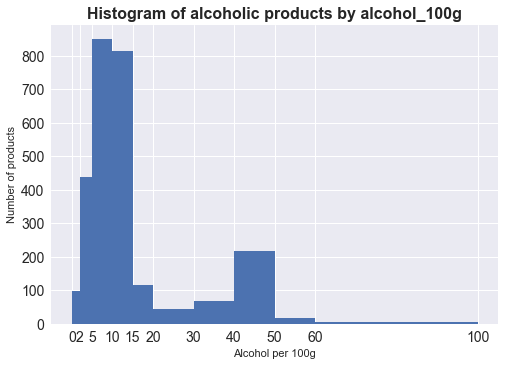

In [58]:
font = {'fontname':'Arial', 'size':'14'}
title_font = {'fontname':'Arial', 'weight' : 'bold','size':'16'}
alcohol=alcohol[alcohol.alcohol_100g>0]
plt.hist(alcohol.alcohol_100g, bins=[0,2,5,10, 15,20, 30, 40,50, 60,100])
plt.xticks([0,2,5,10, 15,20, 30, 40,50, 60,100],**font)
plt.yticks(**font)
plt.xlabel('Alcohol per 100g')
plt.ylabel("Number of products")
plt.title("Histogram of alcoholic products by alcohol_100g",**title_font)
plt.show()

In [59]:


print (alcohol.countries_en.value_counts().head(10))



France                1811
Germany                199
United Kingdom         189
Belgium                 44
United States           39
Russia                  38
France,Switzerland      35
Spain                   30
Belgium,France          22
Italy                   20
Name: countries_en, dtype: int64


In [60]:
countries=['France', 'United Kingdom', "Germany", "Belgium", "United States"]
alcohol=alcohol[alcohol.countries_en.isin(countries)]

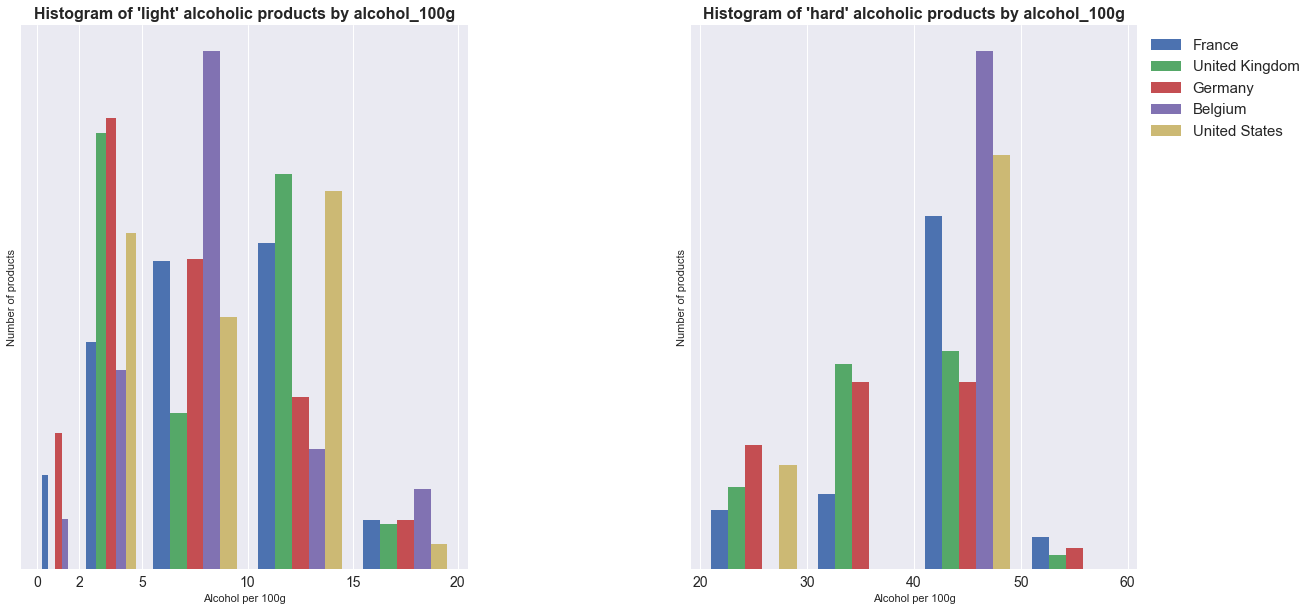

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist([alcohol.alcohol_100g[alcohol.countries_en=="France"],
          alcohol.alcohol_100g[alcohol.countries_en=="United Kingdom"],
          alcohol.alcohol_100g[alcohol.countries_en=="Germany"],
          alcohol.alcohol_100g[alcohol.countries_en=="Belgium"],
          alcohol.alcohol_100g[alcohol.countries_en=="United States"]],
         normed=True, bins=[0,2,5,10, 15,20]
        )
plt.xticks([0,2,5,10, 15,20],**font)
plt.yticks([])
plt.xlabel('Alcohol per 100g')
plt.ylabel("Number of products")
plt.title("Histogram of 'light' alcoholic products by alcohol_100g",**title_font)
plt.subplot(1,2,2)
plt.hist([alcohol.alcohol_100g[alcohol.countries_en=="France"],
          alcohol.alcohol_100g[alcohol.countries_en=="United Kingdom"],
          alcohol.alcohol_100g[alcohol.countries_en=="Germany"],
          alcohol.alcohol_100g[alcohol.countries_en=="Belgium"],
          alcohol.alcohol_100g[alcohol.countries_en=="United States"]],
         normed=True, bins=[20,30,40, 50,60]
        )
plt.xticks([20,30,40,50,60],**font)

plt.yticks([])
plt.xlabel('Alcohol per 100g')
plt.ylabel("Number of products")
plt.legend(countries, loc="upper left",bbox_to_anchor=(1,1),prop={'size':15})
plt.title("Histogram of 'hard' alcoholic products by alcohol_100g",**title_font)
plt.subplots_adjust(wspace=0.5)

plt.show()